We consider a class of learning problems in which an agent liquidates a risky asset while creating both transient price impact driven by an unknown convolution propagator and linear temporary price impact with an unknown parameter. In this notebook we present the exploration phase of a novel approach for non-parametric estimation of the price impact kernel by observing only the visible price process and observe that the experimental simulations confirm the derived sharp bounds on the convergence rate proposed in the paper.


# 1.&nbsp;Problem Formulation

Let $T>0$ and $u^e :[0,T]\to \mathbb{R}$ be a given trading strategy. For each $n\in \mathbb{N}$, consider the visible price process:
\begin{align}
\tag{Visible Price}
S^n_t = A^n_t + M^n_t - \lambda^\star u^e_t -\int_0^t G^\star(t-s) u^e_s d s,
\quad
t\in [0,T],
\end{align}
where
$\lambda^\star >0$  is an unknown instanteneous  impact coefficient,
$G^\star $ is an unknown  square-integrable transient impact kernel,
$(A^n)_{n\in \mathbb{N}}$ are observed  signals, and  $(M^n)_{n\in \mathbb{N}}$ are unobserved zero-mean martingale noises. The processes $(A^n,M^n)_{n\in \mathbb{N}}$ are assumed to be mutually independent.
The agent aims to estimate $(\lambda^\star, G^\star)$ based on the observed trajectories $(S^n,A^n)_{n\in \mathbb{N}}$.


# 2.&nbsp;Regularised Least-squares Estimators and Their Discretizations
Let $(S^n,A^n)_{n\in \mathbb{N}}$ be the observed trajectories. For each $N\in \mathbb{N}$, the agent estimates $\lambda^\star$ by
\begin{align}
\tag{1}
\lambda^N = -\frac{1}{Nu^e_0}\sum_{m=1}^N (S^m_0-A^m_0).
\end{align}
The kernel   $G^\star$
 is estimated by a projected least-squares (LS) estimator:
 For each $K\in \mathbb{N}$,
 consider the grid
 $\pi_K=\{t_i\}_{i=0}^K$ with $t_i=i\Delta t$ and $\Delta t = T/K$,
  and the space
 $
 \textstyle
 \mathcal{V}_K = \left\{G= \sum_{k=0}^{K-1} G_{k} \boldsymbol 1_{[t_k,t_{k+1})}\mid
(G_{k})_{k=0}^{K-1}\subset \mathbb{R}\right\}$.
 Then for each $K\in \mathbb{N}$ and $\tau_N>0$,
 define the LS estimator of $G^\star$ by minimising the following quadratic loss
 over  $\mathcal{V}_K$:
\begin{align}
  G\mapsto
 & \frac{1}{N}\sum_{n=1}^N
 \int_0^T \left|
 S^n_t
-A^n_t
 +\lambda^N u^e_t
 + \int_0^t    u^e(t-s) G_s d s\right|^2 d t
+\tau_N \int_0^T (G_t- H_t)^2 dt,
\end{align}
where $H$ is a given initial guess of $G^\star$.
In pratice, the loss functional can be implemented by discretizing the integrals:
\begin{align}
(G_{k})_{k=0}^{K-1}\mapsto
 \frac{1}{N}\sum_{n=1}^N
 \sum_{j=1}^{K}\left|
 S^n_{t_j}
-A^n_{t_j}
 +\lambda^N u^e_{t_j}
 +
 \sum_{k=0}^{j-1}
   u^e_{t_{j-k}} G_k \Delta t\right|^2 \Delta t
+\tau_N  \sum_{k=0}^{K-1}
 (G_k-H_k)^2 \Delta t.
\end{align}
This is  a quadratic loss  over $\mathbb{R}^K$,
and can be equivalently written as:
\begin{align}
\overrightarrow{G}=(G_{k})_{k=0}^{K-1}\mapsto
 \frac{1}{N}\sum_{n=1}^N
 \left\|
 \overrightarrow{S^n}
-\overrightarrow{A^n}
 +\lambda^N \overrightarrow{u^e}
 +
 \mathbf{U} \overrightarrow{G}  \Delta t\right\|^2_{\mathbb{R}^K} \Delta t
+\tau_N  \|
 \overrightarrow{G} -\overrightarrow{H} \|^2_{\mathbb{R}^K} \Delta t,
\end{align}
where
$$
\mathbf{U}=
\begin{pmatrix}
u^e_{t_1} & 0 &  \cdots & 0 \\
u^e_{t_2} & u^e_{t_1} &  \cdots & 0 \\
\vdots &  \vdots & \ddots  & \vdots \\
u^e_{t_K} & u^e_{t_{K-1}} &   \cdots & u^e_{t_1}
\end{pmatrix}
\quad
\overrightarrow{S^n}
= \begin{pmatrix}
S^n_{t_1} \\
S^n_{t_2} \\
\vdots   \\
S^n_{t_K}
\end{pmatrix},
\quad
\overrightarrow{A^i}
= \begin{pmatrix}
A^n_{t_1} \\
A^n_{t_2} \\
\vdots   \\
A^n_{t_K}
\end{pmatrix},
\quad
\overrightarrow{u^e}
= \begin{pmatrix}
u^e_{t_1} \\
u^e_{t_2} \\
\vdots   \\
u^e_{t_K}
\end{pmatrix},
\quad
\overrightarrow{H}
= \begin{pmatrix}
H_{t_0} \\
H_{t_1} \\
\vdots   \\
H_{t_{K-1}}
\end{pmatrix}.
$$
The minimizer is given by
\begin{align*}
\tag{2}
\overrightarrow{G^{N,K}}= -\left(\tau_N \mathbb{I}_K +\Delta t^2 \mathbf{U}^\top \mathbf{U}\right)^{-1}
\left( \Delta t\mathbf{U}^\top
\left(
\frac{1}{N}\sum_{n=1}^N  \left( \overrightarrow{S^n}
-\overrightarrow{A^n}
 \right) +\lambda^N \overrightarrow{u^e}
 \right)
 -\tau_N \overrightarrow{H}\right),
\end{align*}
where $\mathbb{I}_K$ is the $K \times K$ identity matrix.

# 3.&nbsp;Implementation with Expeonential Kernels and Fractional Kernels
To illustrate the performance of the estimators
([1](#mjx)) and  ([2](#mjx)),
we consider
$\lambda^\star>0$ and
the     kernel $G^\star$ being in one of the following two classes:

- Expential kernel: $G^\star (t) =e^{-\rho t}$ for some $\rho>0$.
- Fractional kernel: $G^\star (t) =t^{-\alpha}$ for some $\alpha\in (0,1/2)$.

To generate the    price trajectories $(S^n-A^n)_{n\in \mathbb{N}}$,
we consider
 a linear trading stratgy of the form
\begin{align}
u^e_t = \beta    t+\gamma, \quad t\in [0,T],
\end{align}
for some $\gamma>0$ and $\beta \in \mathbb{R}$,
and a   noise process:
$$M^n_t=\sigma B^n_t+\iota_0, \quad t\in [0,T],$$
for $\sigma>0$,
and a   normal random variable $\iota_0$  with mean $0$ and variance $\sigma^2$.
Then
 for each $n\in \mathbb{N}$,
 the oberved   price difference $S^n-A^n$
 can be generated
by
([Visible Price](#mjx)):
\begin{align*}
S^n_{t} -A^n_{t}
& =  M^n_{t} - \lambda^\star u^e_{t} -\int_0^t G^\star (t-s) u^e_s ds,
\quad t\in [0,T],
\end{align*}
where
the transient price impact is given by
\begin{align}
\int_0^t G^\star (t-s) u^e_s ds
=\begin{cases}
\frac{e^{-\rho t} (\beta -\rho \gamma)+\rho  \beta t +\rho \gamma -\beta }{\rho^2},
& \text {if $G^\star(t)=e^{-\rho t}$}
\\
\frac{t^{1-\alpha } (\beta t+ (2-\alpha ) \gamma )}{(2-\alpha)(1-\alpha)  },
& \text {if $G^\star(t)=t^{-\alpha}$}.
\end{cases}
\end{align}


In the sequel, we fix a sufficiently fine time grid  $\pi_K$ and examine the convergence of ([1](#mjx)) and  ([2](#mjx)) as $N\to \infty$. The regularization weight
$\tau_N$ in ([2](#mjx)) and the intial guess of $H$ are   chosen as follows according to the regularity of $G^\star$:

- Expential kernel: $\tau_N = N^{-\frac{2}{3}}$, and $H\equiv 0$,
- Fractional kernel: $\tau_N = N^{-\frac{2}{3-2\alpha}}$
and $H\equiv 1$
if $G^\star (t) =t^{-\alpha}$ for all $t>0$.


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

def initial_kernel_guess_H(mesh, h_args):
  H_grid= h_args['a'] + h_args['b'] * mesh
  return H_grid

def compute_linear_u_and_constuct_U(u_e_args, mesh):
    a = u_e_args['a']
    b = u_e_args['b']
    u_e =  (b*mesh) +a
    u_e_to_build_U =  copy.deepcopy(u_e)[1:]
    U = np.zeros([mesh.shape[0]-1,mesh.shape[0]-1])
    for i in range(0,mesh.shape[0]-1):
        U[:,i] = u_e_to_build_U
        u_e_to_build_U = np.insert(u_e_to_build_U, 0, 0)[:-1]
    return u_e, U

def compute_theoretical_kernel(time, rho):
    return np.exp(-rho*time)

def temporary_price_impact(u_e, lambda_theory):
    return u_e*lambda_theory

def transient_price_impact(mesh, u_e_args, rho):
    u_a = u_e_args['a']
    u_b = u_e_args['b']
    if rho == 0:
        return np.divide(mesh*(u_b*mesh+2*u_a),2)
    else:
        return np.divide(np.exp(-rho*mesh) * (u_b-rho*u_a) + rho*u_b*mesh + rho*u_a - u_b, rho*rho)

def generate_M(sigma_brownian,mesh):
    rng = np.random.default_rng(1234)
    normal_sample = rng.normal(loc=0.0, scale=sigma_brownian, size=(sample_size, mesh.shape[0]))
    normal_sample [:,1:] = normal_sample [:,1:] * np.sqrt(mesh[1]-mesh[0])
    M_sample = np.cumsum(normal_sample, axis=1)
    return M_sample

def simulate_S_A_samples(no_of_samples, mesh, sigma_M, transient, temporary):
    m = generate_M(sigma_M,mesh)
    s_minus_a_samples= m - np.tile((temporary + transient), (m.shape[0], 1))
    return s_minus_a_samples

In [2]:
from numpy.linalg import inv
def lse(mesh, s_minus_a_samples,U, u, tau, H):
    K = mesh.shape[0]-1
    delta_t = mesh[1]-mesh[0]
    lambda_N = -np.divide(s_minus_a_samples[:,0].mean(), u[0])
    price_impact_mean = (s_minus_a_samples[:,1:] ).mean(axis=0) + lambda_N * u[1:]
    G_coeffs = -inv(tau*np.identity(K) + delta_t*delta_t*np.transpose(U).dot(U))
    G_N = G_coeffs.dot((np.dot(delta_t*np.transpose(U),price_impact_mean) -  tau*H))

    return lambda_N , G_N


In [3]:
# main algo
time_horizon = 1
time_steps = 200
M_stdv = 0.5
sample_size = int(1*1e5)
tau = (1/sample_size)**(2/3)

u_e_args = {'a':1, 'b':0}
h_args = {'a':0, 'b':1}

mesh = np.append(np.arange(0,time_horizon,np.divide(1,time_steps)),1)

theoretical_lambda = 0.5
kernel_rho = 1

u_e, U = compute_linear_u_and_constuct_U(u_e_args, mesh)

h_t = initial_kernel_guess_H(mesh[:-1], h_args)

G_theory = compute_theoretical_kernel(mesh[1:],kernel_rho)

temp_price_impact = temporary_price_impact(u_e, theoretical_lambda)

trans_price_impact = transient_price_impact(mesh, u_e_args,kernel_rho)

samples = simulate_S_A_samples(sample_size,mesh,M_stdv,trans_price_impact,temp_price_impact)

Lambda_N, G_N = lse(mesh,samples, U, u_e,tau,h_t)

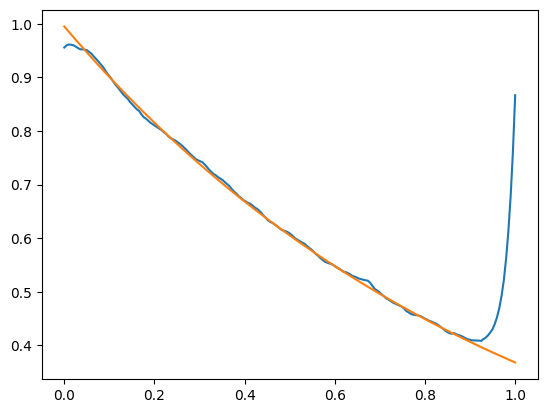

In [4]:
x=np.linspace(0,1,len(G_N))
plt.plot(x,G_N)
plt.plot(x,G_theory)

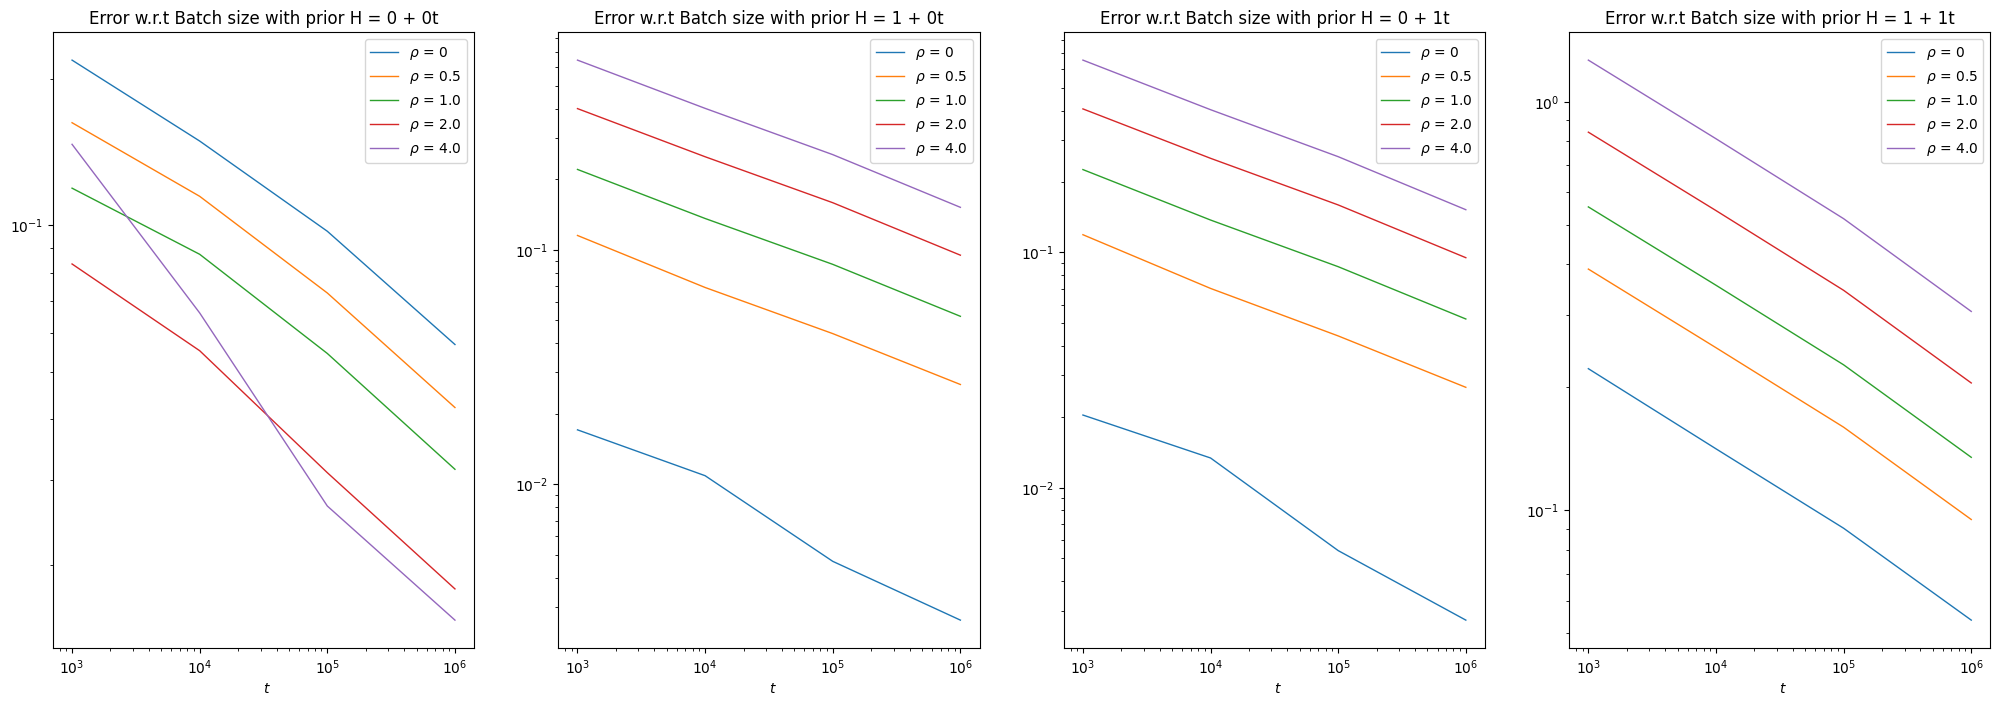

In [7]:
# create list of mean-reverting rates for the exponential kernel
rho_list = [0, 0.5,1.0, 2.0, 4.0]
u_e_args = {'a':1, 'b':0}
# H: H(t)= a + b * t
h_args_dict = [{'a':0, 'b':0},{'a':1, 'b':0},{'a':0, 'b':1},{'a':1, 'b':1}]

error = {}
for h in h_args_dict:
    error[h.__str__()] = {}
    for r in rho_list:
        error[h.__str__()][r] = []

batch_sizes = [10e2,10e3,10e4,10e5]
estimated_kernels = {}
for batch_size in batch_sizes:
    estimated_kernels[batch_size] = {}

    for h_args in h_args_dict:
        fig = plt.figure(figsize=(25, 8))
        u_e, U = compute_linear_u_and_constuct_U(u_e_args, mesh)

        h_t = initial_kernel_guess_H(mesh[:-1], h_args)

        G_theory = compute_theoretical_kernel(mesh[1:],kernel_rho)

        temp_price_impact = temporary_price_impact(u_e, theoretical_lambda)

        trans_price_impact = transient_price_impact(mesh, u_e_args,kernel_rho)

        theory_kernels = []
        estimated_kernels[batch_size][h_args.__str__()] =[]

        for kernel_rho in rho_list:

            G_theory = compute_theoretical_kernel(mesh[1:],kernel_rho)
            temp_price_impact = temporary_price_impact(u_e, theoretical_lambda)
            trans_price_impact = transient_price_impact(mesh, u_e_args,kernel_rho)

            samples = simulate_S_A_samples(sample_size,mesh,M_stdv,trans_price_impact,temp_price_impact)
            tau = (1/batch_size)**(2/3)
            sample_size = int(batch_size)
            Lambda_N, G_N = lse(mesh,samples, U, u_e,tau,h_t)

            lambda_error = np.abs (Lambda_N-theoretical_lambda) /theoretical_lambda

            G_star_l2norm = np.linalg.norm(G_theory ) * np.sqrt(mesh[1]-mesh[0])
            G_error = np.linalg.norm(G_N - G_theory) * np.sqrt(mesh[1]-mesh[0]) /(G_star_l2norm)
            theory_kernels.append(G_theory)
            estimated_kernels[batch_size][h_args.__str__()].append((G_N))
            error[h_args.__str__()][kernel_rho].append(G_error)

        if batch_size == 10e5:
            # plt.subplot(2, 2, 2)
            plt.subplot(1,3 , 2)
            for i in range(len(rho_list)):
                plt.plot(mesh[1:], estimated_kernels[batch_size][h_args.__str__()][i] , '-',  linewidth=1,  label=rf'$\rho$ = {rho_list[i]}'  )
            plt.legend()
            plt.xlabel(rf'  $t$')
            plt.title('Approx. exponential with prior H = {} + {}t using 10e5 samples'.format(h_args['a'],h_args['b']))

            plt.subplot(1,3 , 1)
            for i in range(len(rho_list)):
                plt.plot(mesh[1:],  estimated_kernels[10e3][h_args.__str__()][i] , '-',  linewidth=1,  label=rf'$\rho$ = {rho_list[i]}'  )

            plt.legend()
            plt.xlabel(rf'  $t$')
            plt.title('Approx. exponential with prior H = {} + {}t using 10e3 samples'.format(h_args['a'],h_args['b']))
            plt.show()

